# Witful ML 08 - Regularized (LASSO & Ridge) Regression
by Kaan Kabalak, Editor In Chief @ witfuldata.com

# What is Regularized Regression?

So far, we have gone through several main concepts of ML. From now on, we will go into some advanced topics. We shall start with regularized regression. So, what is it and why do we need it?


To find an answer to these questions, we first have to understand feature coefficients. Don't let the fancy terminology scare you away. Feature coefficient is basically the measure of how strong a feature (X) variable affects the target(y) variable.


When you are building a model it is almost always the best practice to avoid using too many features. Using too many features is bad for two main reasons:


* Extra features mean extra computing. This results in needless waste of energy and time.

* Using unneccessary features will cause the model to 'overlearn' (overfitting).


Regularized Regression is here to solve these problems. It basically runs a linear regression model, but it also takes the coefficients into consideration. Every coefficient is used for the model in accordance with its effect on the outcome. There are different ways to do this and we will talk about them. This provides us with a better result than linear regression which does not do any calculations concerning the coefficients. Regularized regression also helps us select features for our model.


In this chapter we will see how two main regularization methods are implemented with Scikit-learn. We will build a model which aims to predict price of a house based on various variables.


## Note (with an amazing pun joke)

I normally do not like using datasets which have become too mainstream (like the house dataset used in this tutorial). However, the dataset was very fit (pun intended) for the structure of this chapter.

## Data Dictionary

Variable,Explanation

CRIM, The crime rate per capita

ZN, The proportion of residential land zoned for lots over 25000 sq.ft

INDUS, The proportion of non-retail business acres per town

CHAS, The Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX, The nitric oxides concentration (parts per 10 million)

RM, The average number of rooms per dwelling

AGE, The proportion of owner-occupied units built prior to 1940

DIS, The weighted distances to five Boston employment centres

RAD, The index of accessibility to radial highways

TAX, The full-value property-tax rate per $ 10000

PTRATIO, The pupil-teacher ratio by town

LSTAT, The percentage lower status of the population

PRICE, The median value of owner-occupied homes (in $1000)

## Prepare and Check the Data

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
# Form a data frame
house_df = pd.read_csv('housing_data.csv')
house_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
# Check the info
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
# Define X-y
X = house_df.drop('PRICE',axis=1).values

y = house_df['PRICE'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25, random_state = 3)

# LASSO (Least Absolute Shrinkage and Selection Operator)

So, for the first one we have LASSO Regularization. What does it do?

If we are to use the fancy data sciency term, it utilizes something called 'L1 Regularization'

This sounds nice but what does it actually do?


It plays around with the coefficients of the feature coefficients, pushing them towards zero. This process of readjusting coefficients is called 'penalization'. In a way, it punishes coefficients. The coefficients that actually become zero are left out of the model. What good does it do? Well, if we push every coefficient to zero, the ones which were already unimportant will eventually be zero. You can think of it like this:


You are the coach of a football team. You are going to have a game with a rival team soon. The rival team does not play with traditional tactics. They run around a lot and tire their opponents. To compete with them your team needs endurance. Only the players who are able to withstand running for more than an hour should make it into the game. You need to predict their endurance in the game. In other words, your 'y' variable is player endurance. For 'X' variables you have many player attributes and skills. You don't have the time or the need to put these player attributes to test. You only need to see which attributes have an effect on 'y'. In Machine Learning terms, you have to select the correct X (player attribute) variables that have a high level of coefficient measurements when used to predict 'y' (endurance).


What do you do for this?


You make them run a lot in the training. Only the ones with attributes and skills related to endurance will be able to finish the training and play in the game. Making your players and tire them may seem like a punishment ('penalization'), but you do this for their good. 



This is the main logic behind LASSO models: Push every coefficient to zero (penalize them) and only the actually important ones for predicting y will be allowed into the model.


Let's see how it works in Python!

In [5]:
# Instantiate the model
lasso_model = Lasso(alpha=0.1)

This alpha parameter is how hard the LASSO model will 'penalize' the coefficients. It is 1 by default, but 1 would be too 'harsh' for a dataset like this one. We will have a more detailed tutorial on how to tune parameters like alpha and why that actually matters.

In [6]:
# Fit the model
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [7]:
# Model score
lasso_model.score(X_test,y_test)

0.7466802230382312

We can how many feature coefficients were pushed to 0 and left out of the model.

In [8]:
# Coefficients
sum(lasso_model.coef_ == 0)

1

The model left one feature variable out of the model because it was not important enough. 

We can also visualize the coefficients after penalization like this:

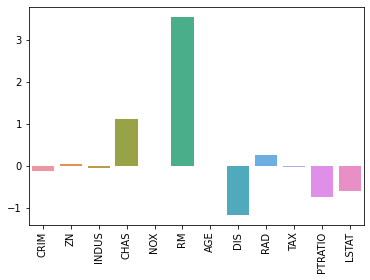

In [9]:
# Let's assign all the variables except the target variable ("PRICE") to the variable X
X = house_df.drop("PRICE",axis=1).values

# Set the target variable
y = house_df["PRICE"].values

# Select the feature variables
feat_vars = house_df.drop("PRICE",axis=1).columns

# Fit a model for visualization
viz_lasso_model= Lasso(alpha=0.1)

# Get the coefficents for the variables
lasso_model_coef = viz_lasso_model.fit(X,y).coef_

#Visualize coefficents for each feature variable with a sns.barplot
sns.barplot(x=feat_vars,y=lasso_model_coef)
plt.xticks(rotation=90)
plt.show()

# Ridge Regression

Ridge is another form of regularized regression. What makes it different than LASSO? 


Instead of pushing coefficients to zero, Ridge Regression focuses on 'weights'. You will hear this word 'weight' a lot when you study data science. It means taking something into consideration based on its importance. You can understand this by thinking about how you live your life. For example, if you have a an exam tomorrow, watching another episode of your favorite show is not that important. We can say that studying for the exam has a weight of 5, whereas watching the show has a weight of 1. 


Ridge Regression takes the feature coefficients, readjusts them by using weights based on their importance. It also penalizes the coefficients, but it does no do it harshly by pushing them into 0, like LASSO does. It just assigns new, and usually lower, values. No feature variable is left out of the model. 


Ridge Regression's way of doing things is called 'L2 Regularization'


Let's see how we can use Ridge Regression in Python.

In [10]:
# Instantiate the model
ridge_model = Ridge(alpha=0.1)

In [11]:
# Fit the model
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [12]:
# Model score
ridge_model.score(X_test,y_test)

0.7668521340499949

As you can see, Ridge Regression performed better than LASSO in this case.

## One more thing to know
You should know that the real benefit of using regularized regression is much more clear when you use it on a very complex dataset with 30-40 features. In small scaled datasets like the one we have here, you shouldn't expect much difference when compared with a normal linear regression models. Sometimes, linear regression models may even perform a bit better than regularized regression models. Shortly put, it all depends on the dataset and your specific goals. Nonetheless, it will be good for you to know how to perform regularized regression and the main logic behind it. 

See you all in the next chapter of Witful ML!